In [1]:
import matplotlib.pyplot as plt # module for visualization
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
loan=pd.read_csv('data/loan_lc.csv')

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
loan.shape

(39717, 111)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [5]:
for col in loan:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

In [6]:
loan[['loan_amnt','installment','loan_status']][:5]

,loan_amnt,installment,loan_status
0,5000,162.87,Fully Paid
1,2500,59.83,Charged Off
2,2400,84.33,Fully Paid
3,10000,339.31,Fully Paid
4,3000,67.79,Current


In [7]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [8]:
loan['loan_status'].value_counts()/loan.shape[0]

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

### Analyse data to find patterns where customer stips paying EMI(charged off) 
### this findings will help bank to better decide to which customer they should give loan 

In [9]:
loan['loan_status'].value_counts()/loan.shape[0]

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

In [10]:
loan['loan_status']=loan['loan_status'].replace({'Fully Paid':0,'Charged Off':1})

In [11]:
loan['loan_status'].value_counts()/loan.shape[0]

0          0.829620
1          0.141677
Current    0.028703
Name: loan_status, dtype: float64

In [12]:
for col in loan:
    print(col,'-->',loan[col].dtype)

id --> int64
member_id --> int64
loan_amnt --> int64
funded_amnt --> int64
funded_amnt_inv --> float64
term --> object
int_rate --> object
installment --> float64
grade --> object
sub_grade --> object
emp_title --> object
emp_length --> object
home_ownership --> object
annual_inc --> float64
verification_status --> object
issue_d --> object
loan_status --> object
pymnt_plan --> object
url --> object
desc --> object
purpose --> object
title --> object
zip_code --> object
addr_state --> object
dti --> float64
delinq_2yrs --> int64
earliest_cr_line --> object
inq_last_6mths --> int64
mths_since_last_delinq --> float64
mths_since_last_record --> float64
open_acc --> int64
pub_rec --> int64
revol_bal --> int64
revol_util --> object
total_acc --> int64
initial_list_status --> object
out_prncp --> float64
out_prncp_inv --> float64
total_pymnt --> float64
total_pymnt_inv --> float64
total_rec_prncp --> float64
total_rec_int --> float64
total_rec_late_fee --> float64
recoveries --> float64
coll

In [13]:
loan_obj=loan.select_dtypes(include='object') # selecting all string columns(object) from the dataset

In [14]:
loan_obj.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [15]:
loan.select_dtypes(include='int64').columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'policy_code', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

## analysing 'term' whether its has any role to play in 'charged off'

In [16]:
loan['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [17]:
loan['term'].value_counts()/loan.shape[0]

 36 months    0.732583
 60 months    0.267417
Name: term, dtype: float64

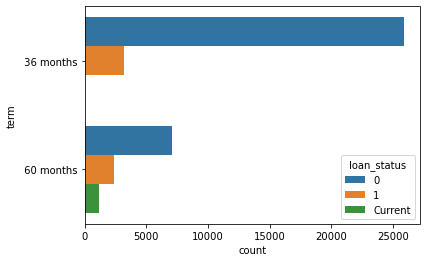

In [18]:
sns.countplot(y='term',hue='loan_status',data=loan)

In [19]:
pd.crosstab(index=loan['term'],columns=loan['loan_status'])

loan_status,0,1,Current
term,,,
36 months,25869,3227,0
60 months,7081,2400,1140


In [20]:
pd.crosstab(index=loan['term'],columns=loan['loan_status'],normalize='index')

loan_status,0,1,Current
term,,,
36 months,0.889091,0.110909,0.000000
60 months,0.666698,0.225967,0.107335


## 5 years loan holder shows very high percentage of charging off !!!!

### analysing 'loan_amnt

In [21]:
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

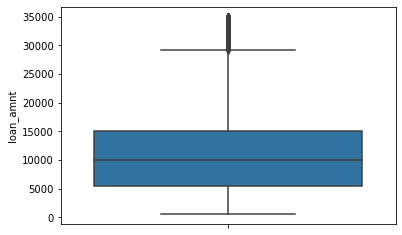

In [22]:
sns.boxplot(y='loan_amnt',data=loan)

## loan_amnt column has some outliers

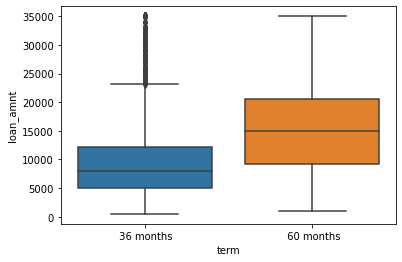

In [23]:
sns.boxplot(y='loan_amnt',x='term',data=loan)

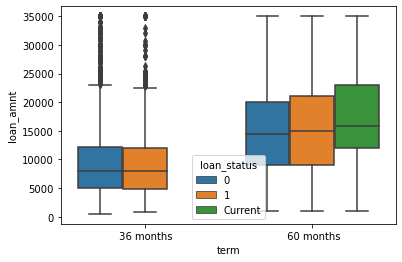

In [24]:
sns.boxplot(y='loan_amnt',x='term',hue='loan_status',data=loan)

## loan_amount column has some outliers

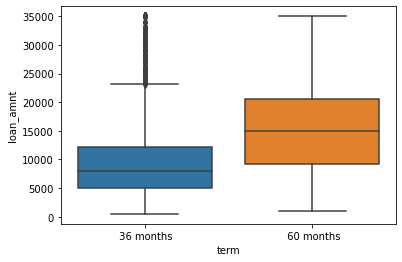

In [25]:
sns.boxplot(y='loan_amnt',x='term',data=loan)

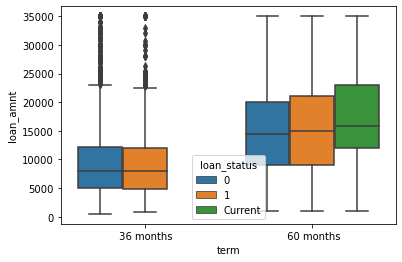

In [26]:
sns.boxplot(y='loan_amnt',x='term',hue='loan_status',data=loan)

In [27]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [28]:
loan.shape

(39717, 111)

In [29]:
for col in loan:
    print(col,'---->',loan[col].isna().sum())

id ----> 0
member_id ----> 0
loan_amnt ----> 0
funded_amnt ----> 0
funded_amnt_inv ----> 0
term ----> 0
int_rate ----> 0
installment ----> 0
grade ----> 0
sub_grade ----> 0
emp_title ----> 2459
emp_length ----> 1075
home_ownership ----> 0
annual_inc ----> 0
verification_status ----> 0
issue_d ----> 0
loan_status ----> 0
pymnt_plan ----> 0
url ----> 0
desc ----> 12940
purpose ----> 0
title ----> 11
zip_code ----> 0
addr_state ----> 0
dti ----> 0
delinq_2yrs ----> 0
earliest_cr_line ----> 0
inq_last_6mths ----> 0
mths_since_last_delinq ----> 25682
mths_since_last_record ----> 36931
open_acc ----> 0
pub_rec ----> 0
revol_bal ----> 0
revol_util ----> 50
total_acc ----> 0
initial_list_status ----> 0
out_prncp ----> 0
out_prncp_inv ----> 0
total_pymnt ----> 0
total_pymnt_inv ----> 0
total_rec_prncp ----> 0
total_rec_int ----> 0
total_rec_late_fee ----> 0
recoveries ----> 0
collection_recovery_fee ----> 0
last_pymnt_d ----> 71
last_pymnt_amnt ----> 0
next_pymnt_d ----> 38577
last_credit_pull_

In [30]:
#loan.columns # numpy array
#list(loan.columns) # python list of columns
nullcols=[col for col in list(loan.columns) if loan[col].isna().sum()/loan.shape[0]>.05]

In [31]:
len(nullcols)

59

In [32]:
loan=loan.drop(nullcols,axis=1)

In [33]:
loan.shape

(39717, 52)

In [34]:
len(loan['term'].unique())

2

In [35]:
for col in loan:
    print(col,'---->',len(loan[col].unique()))

id ----> 39717
member_id ----> 39717
loan_amnt ----> 885
funded_amnt ----> 1041
funded_amnt_inv ----> 8205
term ----> 2
int_rate ----> 371
installment ----> 15383
grade ----> 7
sub_grade ----> 35
emp_length ----> 12
home_ownership ----> 5
annual_inc ----> 5318
verification_status ----> 3
issue_d ----> 55
loan_status ----> 3
pymnt_plan ----> 1
url ----> 39717
purpose ----> 14
title ----> 19616
zip_code ----> 823
addr_state ----> 50
dti ----> 2868
delinq_2yrs ----> 11
earliest_cr_line ----> 526
inq_last_6mths ----> 9
open_acc ----> 40
pub_rec ----> 5
revol_bal ----> 21711
revol_util ----> 1090
total_acc ----> 82
initial_list_status ----> 1
out_prncp ----> 1137
out_prncp_inv ----> 1138
total_pymnt ----> 37850
total_pymnt_inv ----> 37518
total_rec_prncp ----> 7976
total_rec_int ----> 35148
total_rec_late_fee ----> 1356
recoveries ----> 4040
collection_recovery_fee ----> 2616
last_pymnt_d ----> 102
last_pymnt_amnt ----> 34930
last_credit_pull_d ----> 107
collections_12_mths_ex_med ----> 2
p

In [36]:
onevalcols=[col for col in list(loan.columns) if len(loan[col].unique())==1]

In [37]:
loan=loan.drop(onevalcols,axis=1)

In [38]:
loan.shape

(39717, 46)

In [39]:
list(loan.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

## Analysing 'int_rate'
### converting 'int_rate' from string(object) -> float

In [40]:
loan['int_rate'][:5]

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [41]:
s="10.65%"

In [42]:
s1=s.replace("%","")

In [43]:
s1

'10.65'

In [44]:
loan['int_rate']=loan['int_rate'].str.replace('%','')

In [45]:
loan['int_rate'][:5]

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [46]:
loan['int_rate']=loan['int_rate'].astype('float') # converting data type of a series

In [47]:
loan['int_rate'][:5]

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

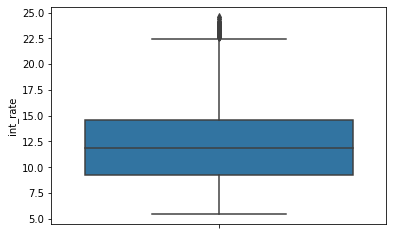

In [48]:
sns.boxplot(y='int_rate',data=loan)

In [49]:
loan['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

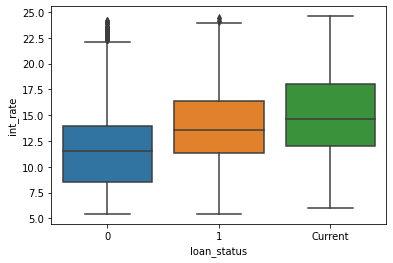

In [50]:
sns.boxplot(y='int_rate',x='loan_status',data=loan)

### it seems that int_rate is higher for the charging off cases

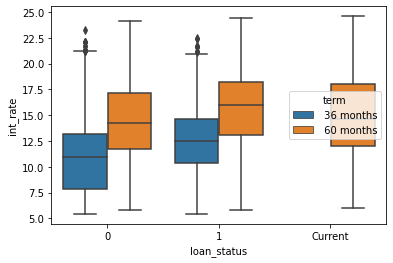

In [51]:
sns.boxplot(y='int_rate',x='loan_status',hue='term',data=loan)

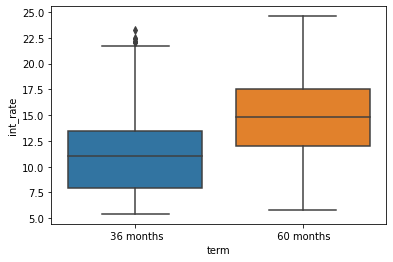

In [52]:
sns.boxplot(y='int_rate',x='term',data=loan)

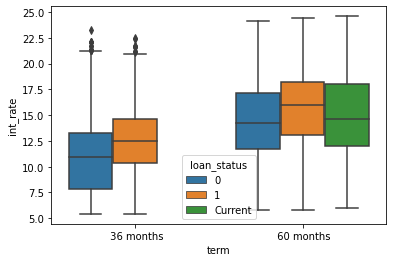

In [53]:
sns.boxplot(y='int_rate',x='term',hue='loan_status',data=loan)

In [54]:
loan['purpose'][:5]

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

In [55]:
len(loan['purpose'].unique())

14

In [56]:
loan['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

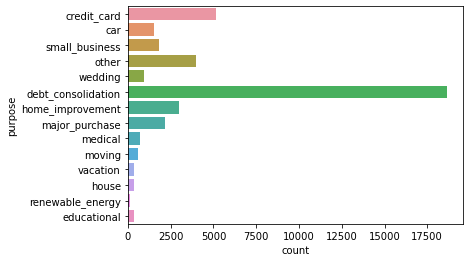

In [57]:
sns.countplot(y='purpose',data=loan)

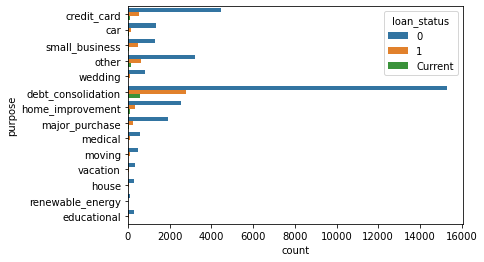

In [58]:
sns.countplot(y='purpose',hue='loan_status',data=loan)

In [59]:
pd.crosstab(index=loan['purpose'],columns=loan['loan_status'],normalize='index')

loan_status,0,1,Current
purpose,,,
car,0.864429,0.103292,0.032279
credit_card,0.874269,0.105653,0.020078
debt_consolidation,0.820128,0.148436,0.031436
educational,0.827692,0.172308,0.000000
home_improvement,0.849462,0.116599,0.033938
house,0.808399,0.154856,0.036745
major_purchase,0.881573,0.101509,0.016918
medical,0.829726,0.152958,0.017316
moving,0.830189,0.157804,0.012007


In [60]:
pd.crosstab(index=loan['purpose'],columns=loan['loan_status'],normalize='index').sort_values(by=1,ascending=False)

loan_status,0,1,Current
purpose,,,
small_business,0.699672,0.259847,0.040481
renewable_energy,0.805825,0.184466,0.009709
educational,0.827692,0.172308,0.000000
other,0.809416,0.158527,0.032056
moving,0.830189,0.157804,0.012007
house,0.808399,0.154856,0.036745
medical,0.829726,0.152958,0.017316
debt_consolidation,0.820128,0.148436,0.031436
vacation,0.845144,0.139108,0.015748


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

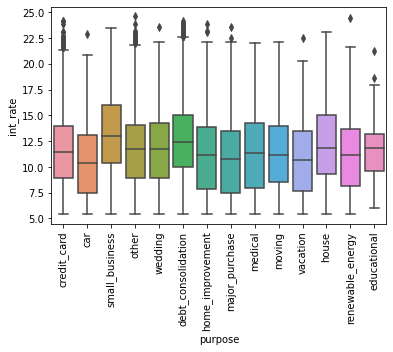

In [61]:
sns.boxplot(y='int_rate',x='purpose',data=loan)
plt.xticks(rotation=90)

In [62]:
loan.pivot_table(values='int_rate',index='purpose').sort_values(by='int_rate',ascending=False)

,int_rate
purpose,
small_business,13.009048
debt_consolidation,12.487890
house,12.228136
wedding,11.885544
other,11.815111
credit_card,11.701173
educational,11.650831
moving,11.563619
medical,11.492121


In [63]:
loan.pivot_table(values='int_rate',index='purpose',columns='loan_status').sort_values(by=1,ascending=False)

loan_status,0,1,Current
purpose,,,
house,11.570812,15.257966,13.920714
debt_consolidation,12.056410,14.275598,15.303379
small_business,12.410188,14.203747,15.690946
wedding,11.582867,13.488125,16.522381
other,11.379220,13.434202,14.814453
credit_card,11.408515,13.405000,15.478835
medical,11.083791,13.322642,14.888333
home_improvement,11.011341,13.304006,14.594356
major_purchase,10.559061,12.860495,13.537297


## from the above we can find 'small-business' category is risky because of theire high charged off rate
## 'debt-consolidation' is also a risky category as 47% of loans falls in this category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

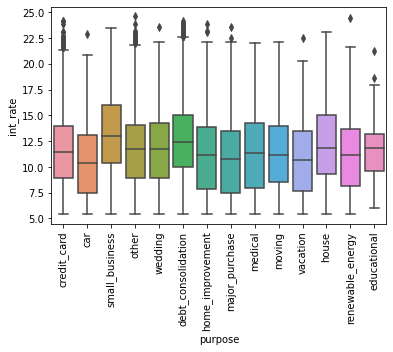

In [64]:
sns.boxplot(y='int_rate', x='purpose', data=loan)
plt.xticks(rotation=90)

In [65]:
loan.pivot_table(values='int_rate', index='purpose').sort_values(by='int_rate', ascending=False)

,int_rate
purpose,
small_business,13.009048
debt_consolidation,12.487890
house,12.228136
wedding,11.885544
other,11.815111
credit_card,11.701173
educational,11.650831
moving,11.563619
medical,11.492121


In [66]:
loan.pivot_table(values='int_rate',index='purpose',columns='loan_status').sort_values(by=1,ascending=False)

loan_status,0,1,Current
purpose,,,
house,11.570812,15.257966,13.920714
debt_consolidation,12.056410,14.275598,15.303379
small_business,12.410188,14.203747,15.690946
wedding,11.582867,13.488125,16.522381
other,11.379220,13.434202,14.814453
credit_card,11.408515,13.405000,15.478835
medical,11.083791,13.322642,14.888333
home_improvement,11.011341,13.304006,14.594356
major_purchase,10.559061,12.860495,13.537297


In [67]:
loansb=loan[loan['purpose']=='small_business']

In [69]:
loansb.shape

(1828, 46)

In [70]:
list(loan.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [71]:
loan['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [72]:
loan[:5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


## analysing 'grade'

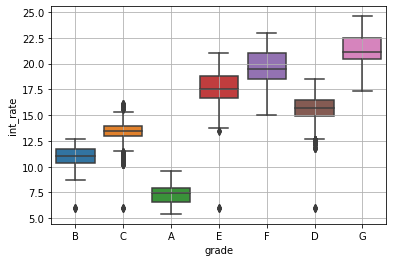

In [73]:
sns.boxplot(y='int_rate',x='grade',data=loan)
plt.grid(True)

In [74]:
pd.crosstab(index=loan['grade'],columns=loan['loan_status'],normalize='index').sort_values(by=1,ascending=False)

loan_status,0,1,Current
grade,,,
G,0.626582,0.319620,0.053797
F,0.626311,0.304099,0.069590
E,0.685433,0.251583,0.062984
D,0.747503,0.210665,0.041832
C,0.801062,0.166337,0.032601
B,0.852745,0.118552,0.028702
A,0.936341,0.059693,0.003966


In [75]:
loan[loan['grade']=='G']['purpose'].value_counts()

debt_consolidation    170
small_business         47
credit_card            29
other                  22
home_improvement       16
wedding                 6
house                   6
major_purchase          6
moving                  5
medical                 3
renewable_energy        2
car                     2
educational             1
vacation                1
Name: purpose, dtype: int64

In [76]:
loan[loan['grade']=='F']['purpose'].value_counts()

debt_consolidation    596
credit_card           102
small_business         97
other                  84
home_improvement       63
major_purchase         28
wedding                21
house                  15
medical                14
car                    11
moving                  9
educational             4
renewable_energy        3
vacation                2
Name: purpose, dtype: int64

## annual_inc vs purpose

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

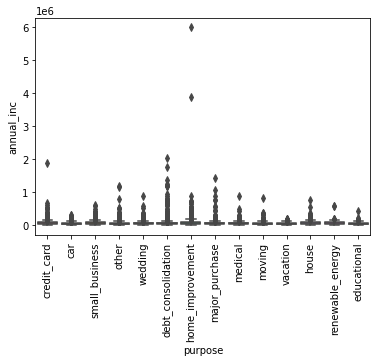

In [77]:
sns.boxplot(y='annual_inc',x='purpose',data=loan)
plt.xticks(rotation=90)

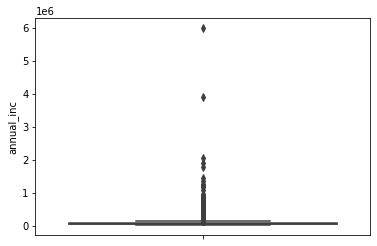

In [78]:
sns.boxplot(y='annual_inc',data=loan)

In [79]:
np.round(loan['annual_inc'].describe(),4)

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [80]:
loan['annual_inc'][:5]

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

In [81]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [82]:
loan['annual_inc'].describe()

count     39717.00000
mean      68968.92638
std       63793.76579
min        4000.00000
25%       40404.00000
50%       59000.00000
75%       82300.00000
max     6000000.00000
Name: annual_inc, dtype: float64

In [83]:
loan[loan['annual_inc']>5000000].shape

(1, 46)

In [84]:
iqr=82000-40000

In [85]:
thmax=82000+1.5*iqr

In [86]:
thmax

145000.0

In [87]:
loan[loan['annual_inc']>145000].shape

(1845, 46)

In [88]:
loan1=loan[ ~(loan['annual_inc']>145000) ]

In [89]:
loan1['annual_inc'].describe()

count    37872.00000
mean     61355.62156
std      28204.38100
min       4000.00000
25%      40000.00000
50%      56160.00000
75%      78000.00000
max     145000.00000
Name: annual_inc, dtype: float64

In [90]:
loan1.shape

(37872, 46)

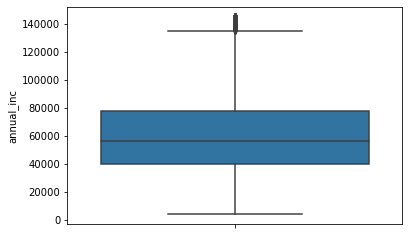

In [91]:
sns.boxplot(y='annual_inc',data=loan1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

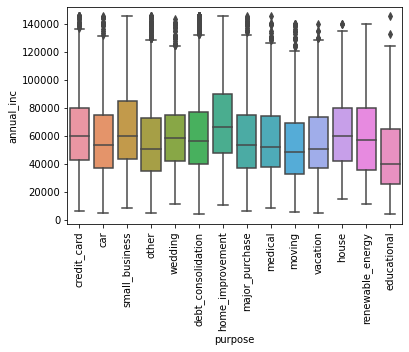

In [92]:
sns.boxplot(y='annual_inc',x='purpose',data=loan1)
plt.xticks(rotation=90)

## annual_inc vs loan_amt

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [None None None ... None None None]

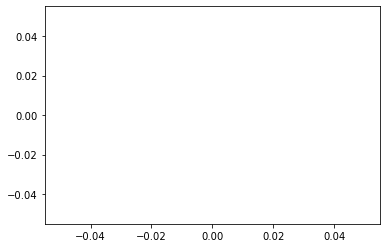

In [94]:
sns.scatterplot(x='annual_inc',y='loan_amnt',hue='loan_status',data=loan1)

## annual_inc vs int_rate

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [None None None ... None None None]

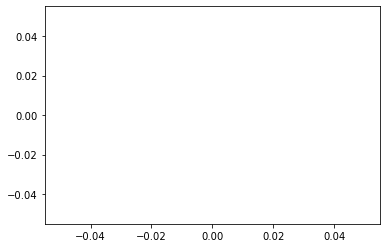

In [95]:
sns.scatterplot(x='annual_inc',y='int_rate',hue='loan_status',data=loan1)

In [96]:
loan['dti'].describe()

count   39717.00000
mean       13.31513
std         6.67859
min         0.00000
25%         8.17000
50%        13.40000
75%        18.60000
max        29.99000
Name: dti, dtype: float64

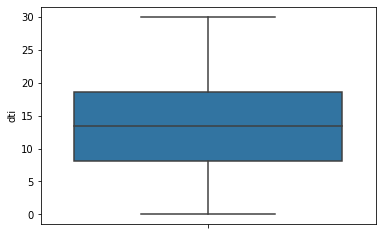

In [97]:
sns.boxplot(y='dti',data=loan)

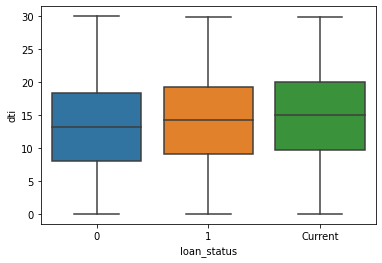

In [98]:
sns.boxplot(y='dti',x='loan_status',data=loan)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [None None None ... None None None]

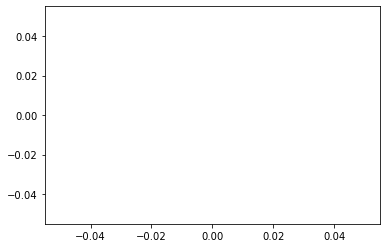

In [99]:
sns.scatterplot(x='annual_inc',y='dti',hue='loan_status',data=loan1)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [None None None ... None None None]

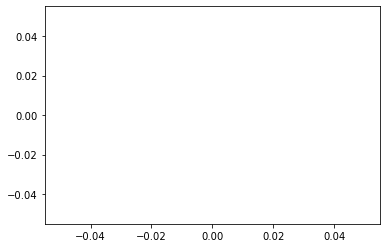

In [100]:
sns.scatterplot(x='loan_amnt',y='dti',hue='loan_status',data=loan1)